# Linear Regression Bike Sharing Assignment

### Introduction

Bike-sharing programs give people an easy way to get around for a short time by allowing them to borrow and return bikes to computer-controlled docking stations. Bikes can be accessed for a fee or sometimes for free thanks to this creative transportation option, which makes it well-liked in cities. Even if this system is useful and convenient, the Covid-19 outbreak has caused major problems for the bike-sharing industry by upsetting consumer habits and revenue sources.

### Business Problem

Due to the continued lockdowns and the economic effects of the pandemic, BikeIndia, a US-based bike-sharing company, has seen a dramatic drop in sales. The company is at a pivotal point where a strong business plan is necessary to recover and drive revenue development after the pandemic, as the market conditions make it challenging to maintain operations. Understanding consumer demand and the variables that affect it becomes essential to achieving this.

### Objective

This study's goal is to assist BikeIndia in identifying and evaluating the major variables influencing the demand for shared bikes in the US market. The study specifically seeks to:

1. Identify the factors that strongly predict demand for shared bikes.
2. Assess the degree to which these factors account for variations in the demand for bikes.
3. Give BikeIndia actionable insights so they can anticipate client wants, streamline operations, and obtain a competitive advantage in the market after things return to normal.


The results will enable BikeIndia to adjust to client expectations, make well-informed strategic decisions, and fortify their position against rivals in order to optimize profitability.

## Step 1: Reading and Understanding the Data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [2]:
# Read the dataset
day = pd.read_csv('day.csv')

In [3]:
# Print dimensions of dataframe
day.shape

(730, 16)

In [4]:
# Print first 2 records of dataframe
day.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801


In [5]:
# Check basic information of data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Check basic statistic of data
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [7]:
# Check for null percentage 
100*(day.isna().sum()/len(day))

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

In [8]:
# Check for duplicates
day.duplicated().value_counts()

False    730
Name: count, dtype: int64

In [9]:
# Removing redundant & unwanted columns
day.drop(['instant', 'dteday', 'casual', 'registered'], axis=1, inplace=True)

In [10]:
# Printing new dimension of data
day.shape

(730, 12)

In [11]:
# Print first 2 records of new dataframe
day.head(2)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801


In [12]:
# renaming few columns for better readibility
day.rename(columns={'yr':'year', 'mnth':'month', 'hum':'humidity'}, inplace=True)

In [13]:
# Print first 2 records of new dataframe
day.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801


In [14]:
# mapping the season column
day['season'] = day['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

In [15]:
# mapping the year column
day['year'] = day['year'].map({0:2018, 1:2019})

In [16]:
# mapping the month column
day['month'] = pd.to_datetime(day['month'], format='%m').dt.strftime('%b')

In [17]:
# mapping the month column
day['weekday'] = day['weekday'].map({0:'sun', 1:'mon', 2:'tue', 3:'wed', 4:'thu', 5:'fri', 6:'sat'})

In [18]:
# mapping the weathersit column
day['weathersit'] = day['weathersit'].map({1:'Clear', 2:'Misty', 3:'Light_SnowRain', 4:'Heavy_SnowRain'})

In [19]:
# Print first 2 records of new dataframe
day.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,2018,Jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,2018,Jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801


In [20]:
# Check basic information of data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## Step 2: Visualising the Data

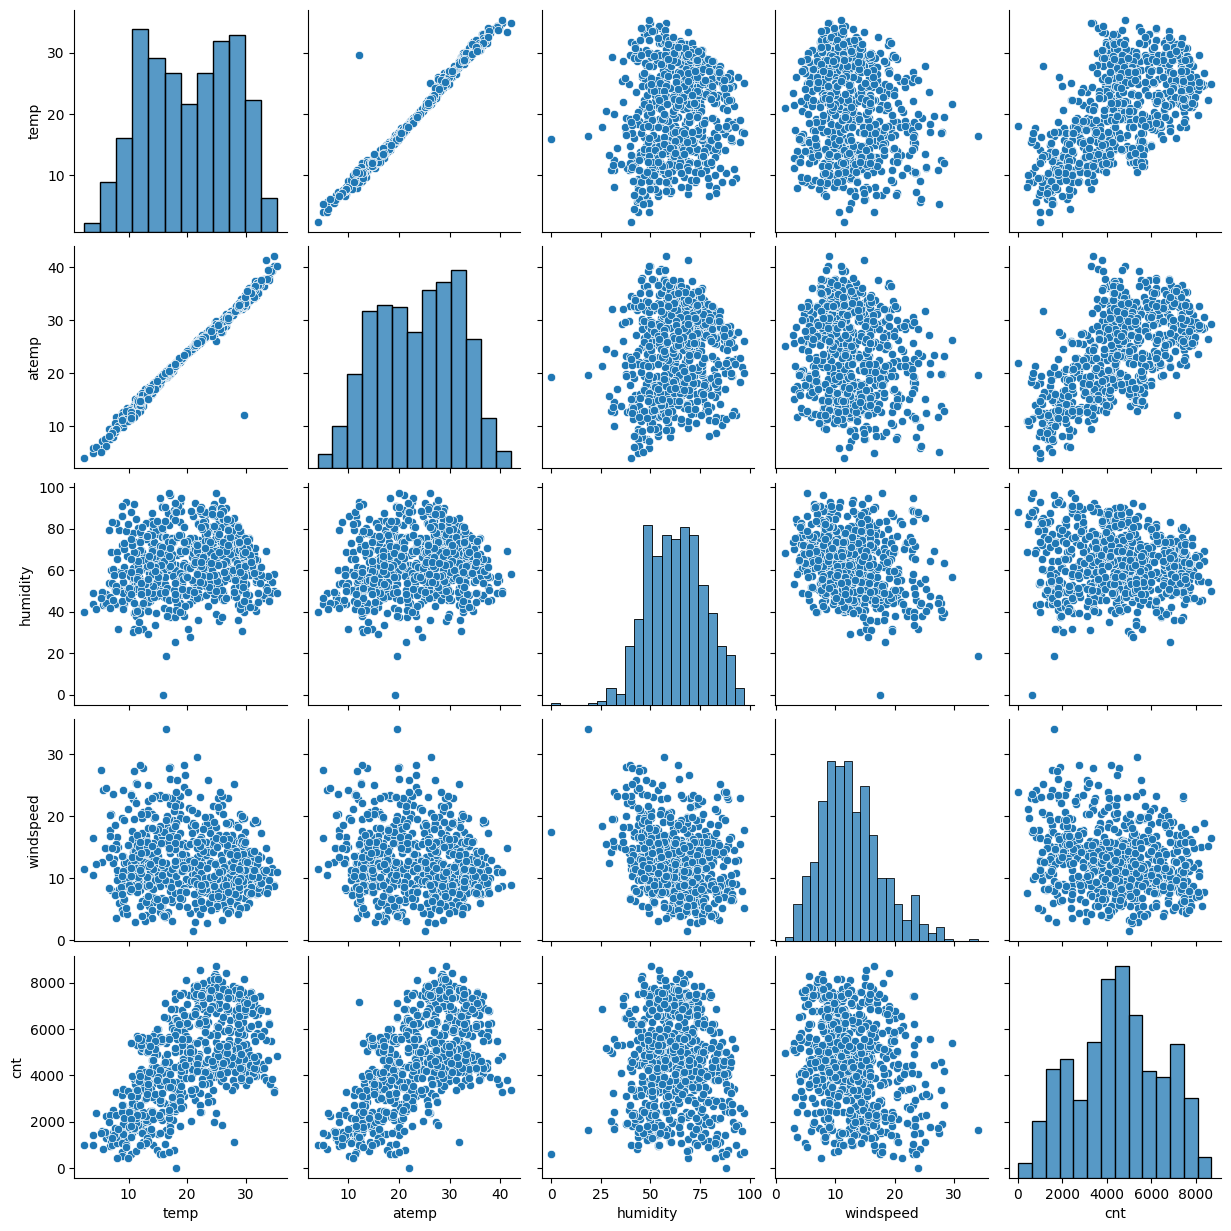

In [21]:
# Visualizing the numerical variables
sns.pairplot(day, vars=['temp', 'atemp', 'humidity', 'windspeed', 'cnt'])
plt.show()

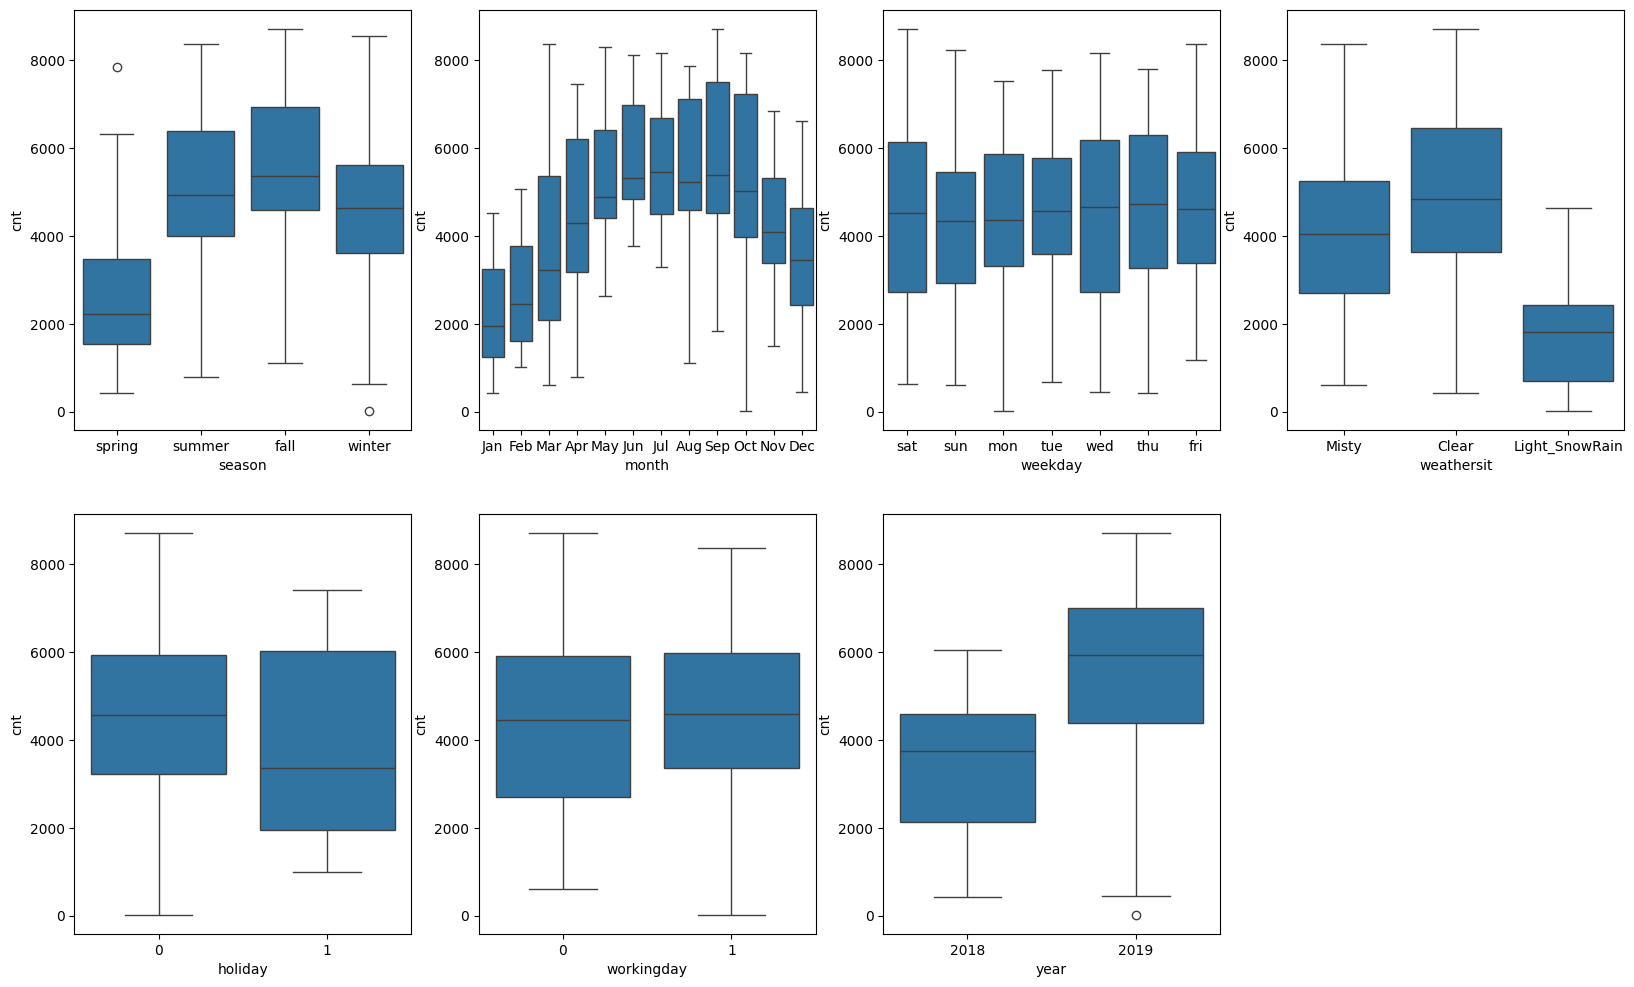

In [22]:
# Visualizing the categorical variables
plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = day)

plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = day)

plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = day)

plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day)

plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = day)

plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day)

plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = day)
plt.show()

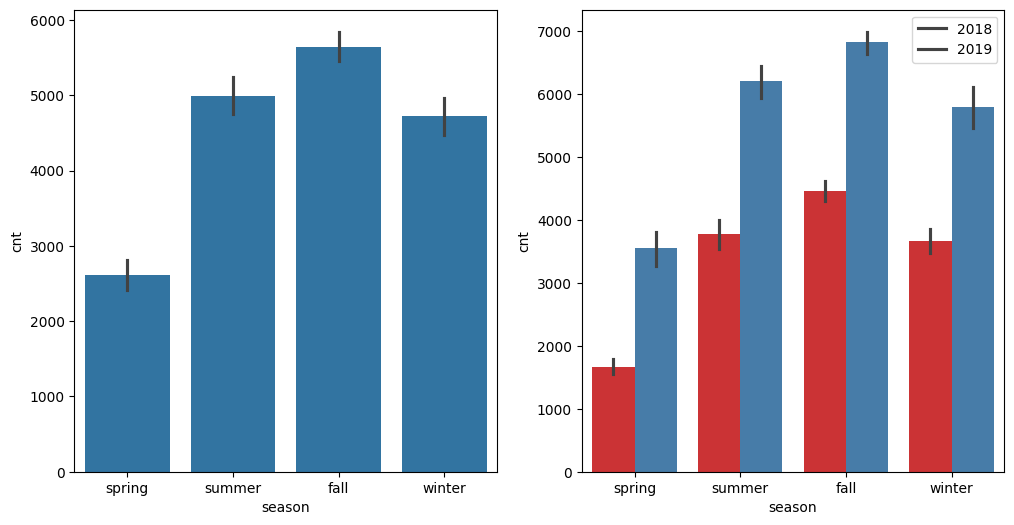

In [23]:
# visualization for season column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'season', y = 'cnt', data = day)

plt.subplot(1,2,2)
sns.barplot(x = 'season', y = 'cnt', data = day, hue = 'year', palette = 'Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

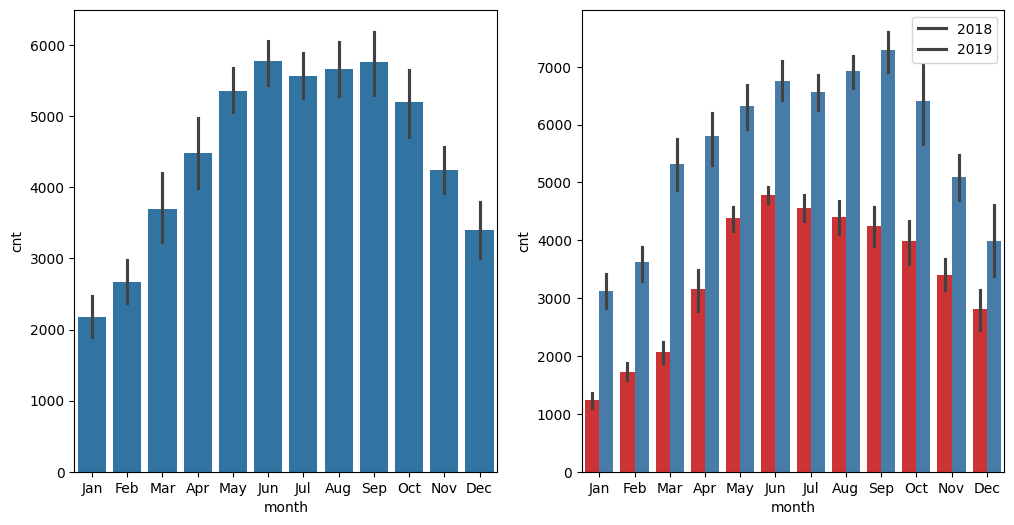

In [24]:
# visualization for month column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'month', y = 'cnt', data = day)

plt.subplot(1,2,2)
sns.barplot(x = 'month', y = 'cnt', data = day, hue = 'year', palette = 'Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

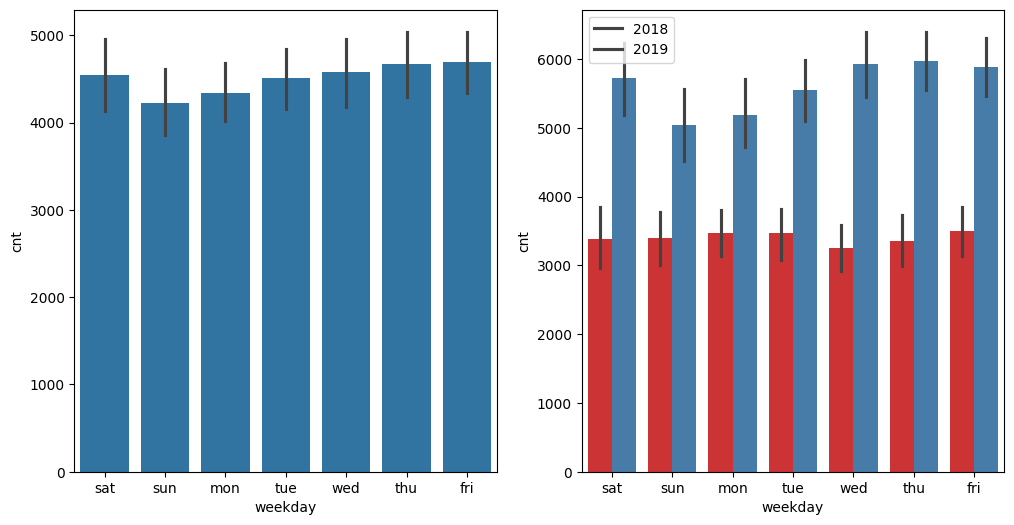

In [25]:
# visualization for weekday column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'weekday', y = 'cnt', data = day)

plt.subplot(1,2,2)
sns.barplot(x = 'weekday', y = 'cnt', data = day, hue = 'year', palette = 'Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

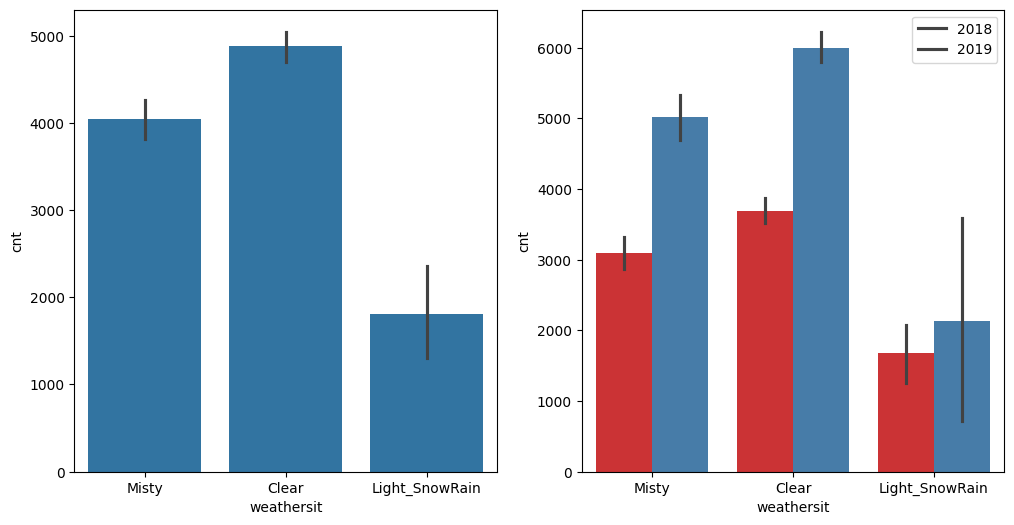

In [26]:
# visualization for weathersit column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'weathersit', y = 'cnt', data = day)

plt.subplot(1,2,2)
sns.barplot(x = 'weathersit', y = 'cnt', data = day, hue = 'year', palette = 'Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

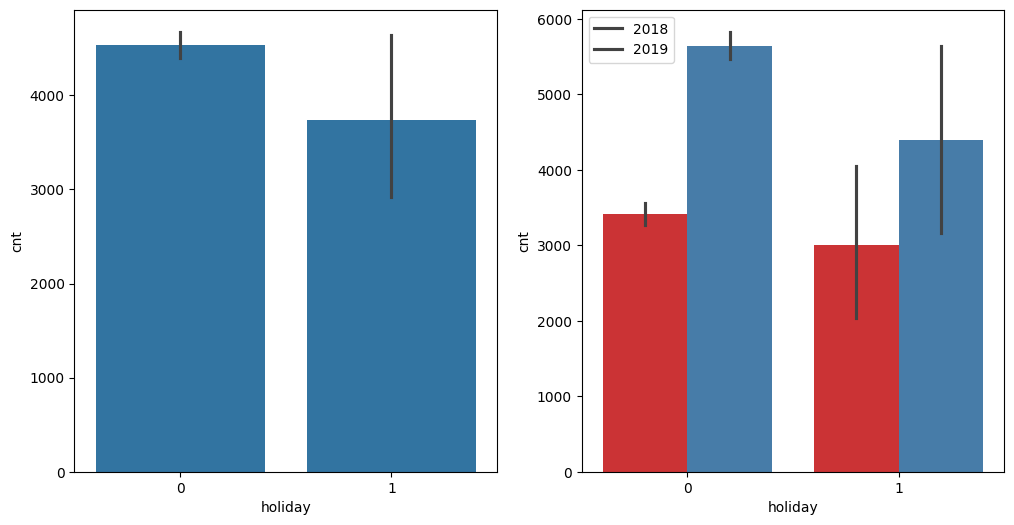

In [27]:
# visualization for holiday column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'holiday', y = 'cnt', data = day)

plt.subplot(1,2,2)
sns.barplot(x = 'holiday', y = 'cnt', data = day, hue = 'year', palette = 'Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

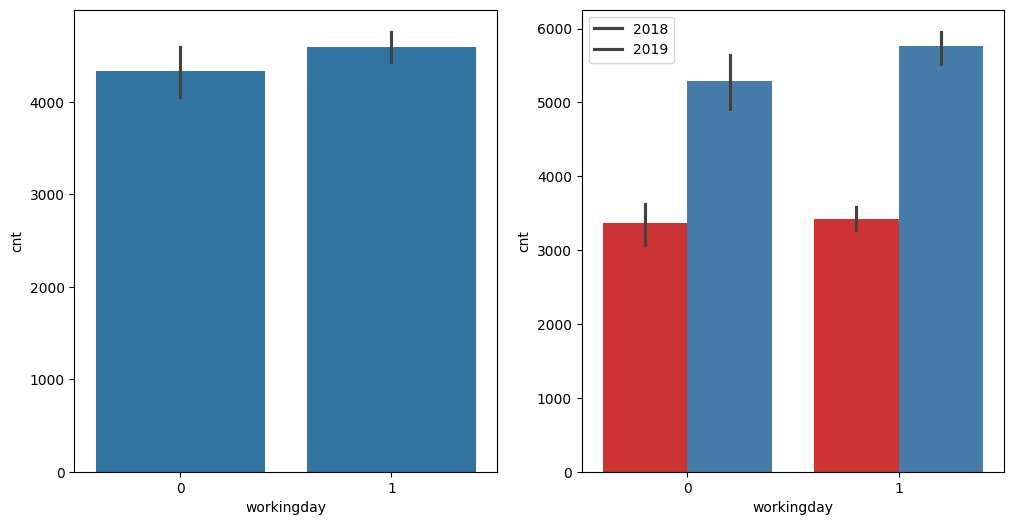

In [28]:
# visualization for workingday column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'workingday', y = 'cnt', data = day)

plt.subplot(1,2,2)
sns.barplot(x = 'workingday', y = 'cnt', data = day, hue = 'year', palette = 'Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

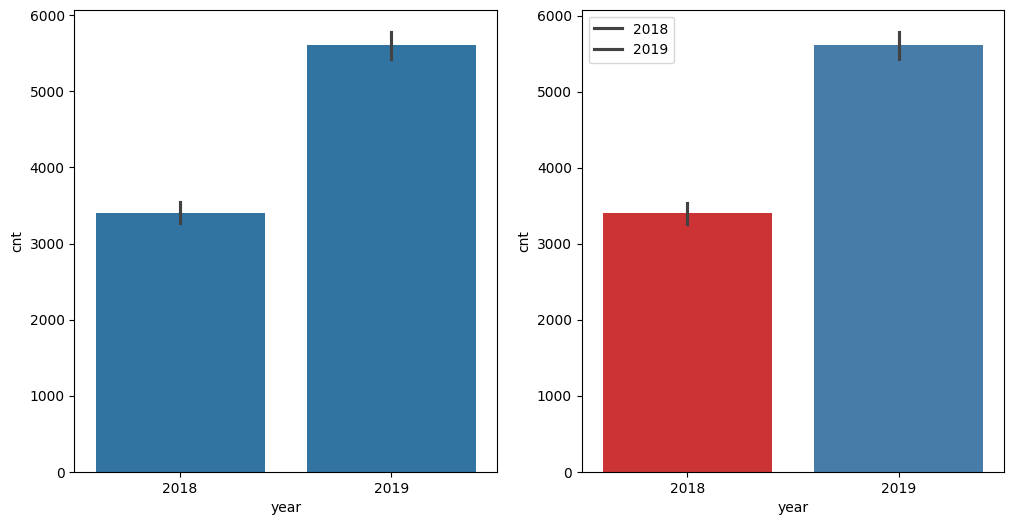

In [29]:
# visualization for year column
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'year', y = 'cnt', data = day)

plt.subplot(1,2,2)
sns.barplot(x = 'year', y = 'cnt', data = day, hue = 'year', palette = 'Set1')
plt.legend(labels=['2018', '2019'])
plt.show()

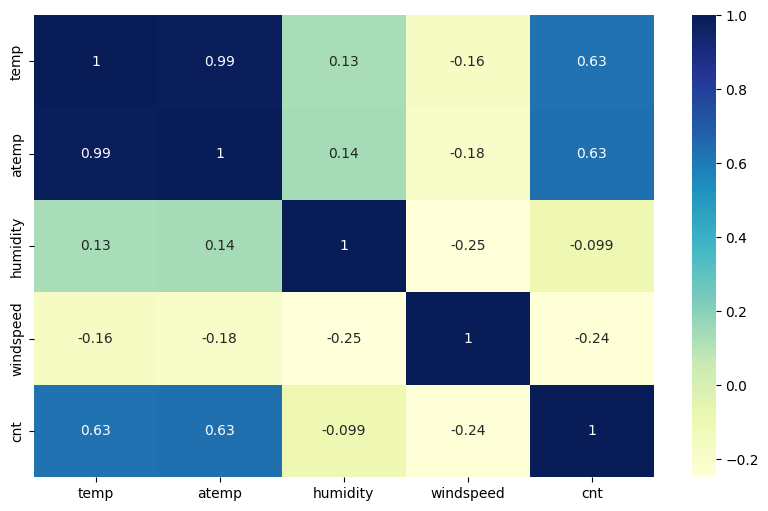

In [30]:
# Checking the correlation between the numerical variables
plt.figure(figsize = (10, 6))
sns.heatmap(day[['temp', 'atemp', 'humidity', 'windspeed', 'cnt']].corr(), annot = True, cmap="YlGnBu")
plt.show()

## Step 3: Data Preparation

In [31]:
# Dummy variable creation for month, weekday, weathersit and season variables.
months = pd.get_dummies(day['month'], drop_first=True).astype(int)
weekdays = pd.get_dummies(day['weekday'], drop_first=True).astype(int)
weathersit = pd.get_dummies(day['weathersit'], drop_first=True).astype(int)
seasons = pd.get_dummies(day['season'], drop_first=True).astype(int)

In [32]:
# Merging  the dataframe, with the dummy variable dataset. 
day = pd.concat([day, months, weekdays, weathersit, seasons], axis=1)

In [33]:
# Printing new dimension of data
day.shape

(730, 34)

In [34]:
# Print first 2 records of new dataframe
day.head(2)

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
0,spring,2018,Jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,2018,Jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0


In [35]:
# Check basic information of data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Aug             730 non-null    int32  
 13  Dec             730 non-null    int32  
 14  Feb             730 non-null    int32  
 15  Jan             730 non-null    int32  
 16  Jul             730 non-null    int32  
 17  Jun             730 non-null    int

In [36]:
# dropping the redundant dummy var
day.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [37]:
# Printing new dimension of data
day.shape

(730, 30)

In [38]:
# Print first 2 records of new dataframe
day.head(2)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
0,2018,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,2018,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0


In [39]:
# Check basic information of data
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Aug             730 non-null    int32  
 9   Dec             730 non-null    int32  
 10  Feb             730 non-null    int32  
 11  Jan             730 non-null    int32  
 12  Jul             730 non-null    int32  
 13  Jun             730 non-null    int32  
 14  Mar             730 non-null    int32  
 15  May             730 non-null    int32  
 16  Nov             730 non-null    int32  
 17  Oct             730 non-null    int

## Step 4: Splitting the Data into Training and Testing Sets

In [40]:
# train-test split
df_train, df_test = train_test_split(day, train_size=0.7, random_state=100)

In [41]:
# check the dimenstion of training datatset
df_train.shape

(510, 30)

In [42]:
# check the dimension of testing datatset
df_test.shape

(220, 30)

In [43]:
# Rescaling the features using MinMaxScaler
scaler = MinMaxScaler()

In [44]:
# Apply scaler() to numeric columns
num_vars = ['temp','atemp','humidity','windspeed','cnt']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [45]:
# verifying the head after appying scaling.
df_train[num_vars].head()

,temp,atemp,humidity,windspeed,cnt
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [46]:
# Check basic statistic of data after appying scaling.
df_train[num_vars].describe()

,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


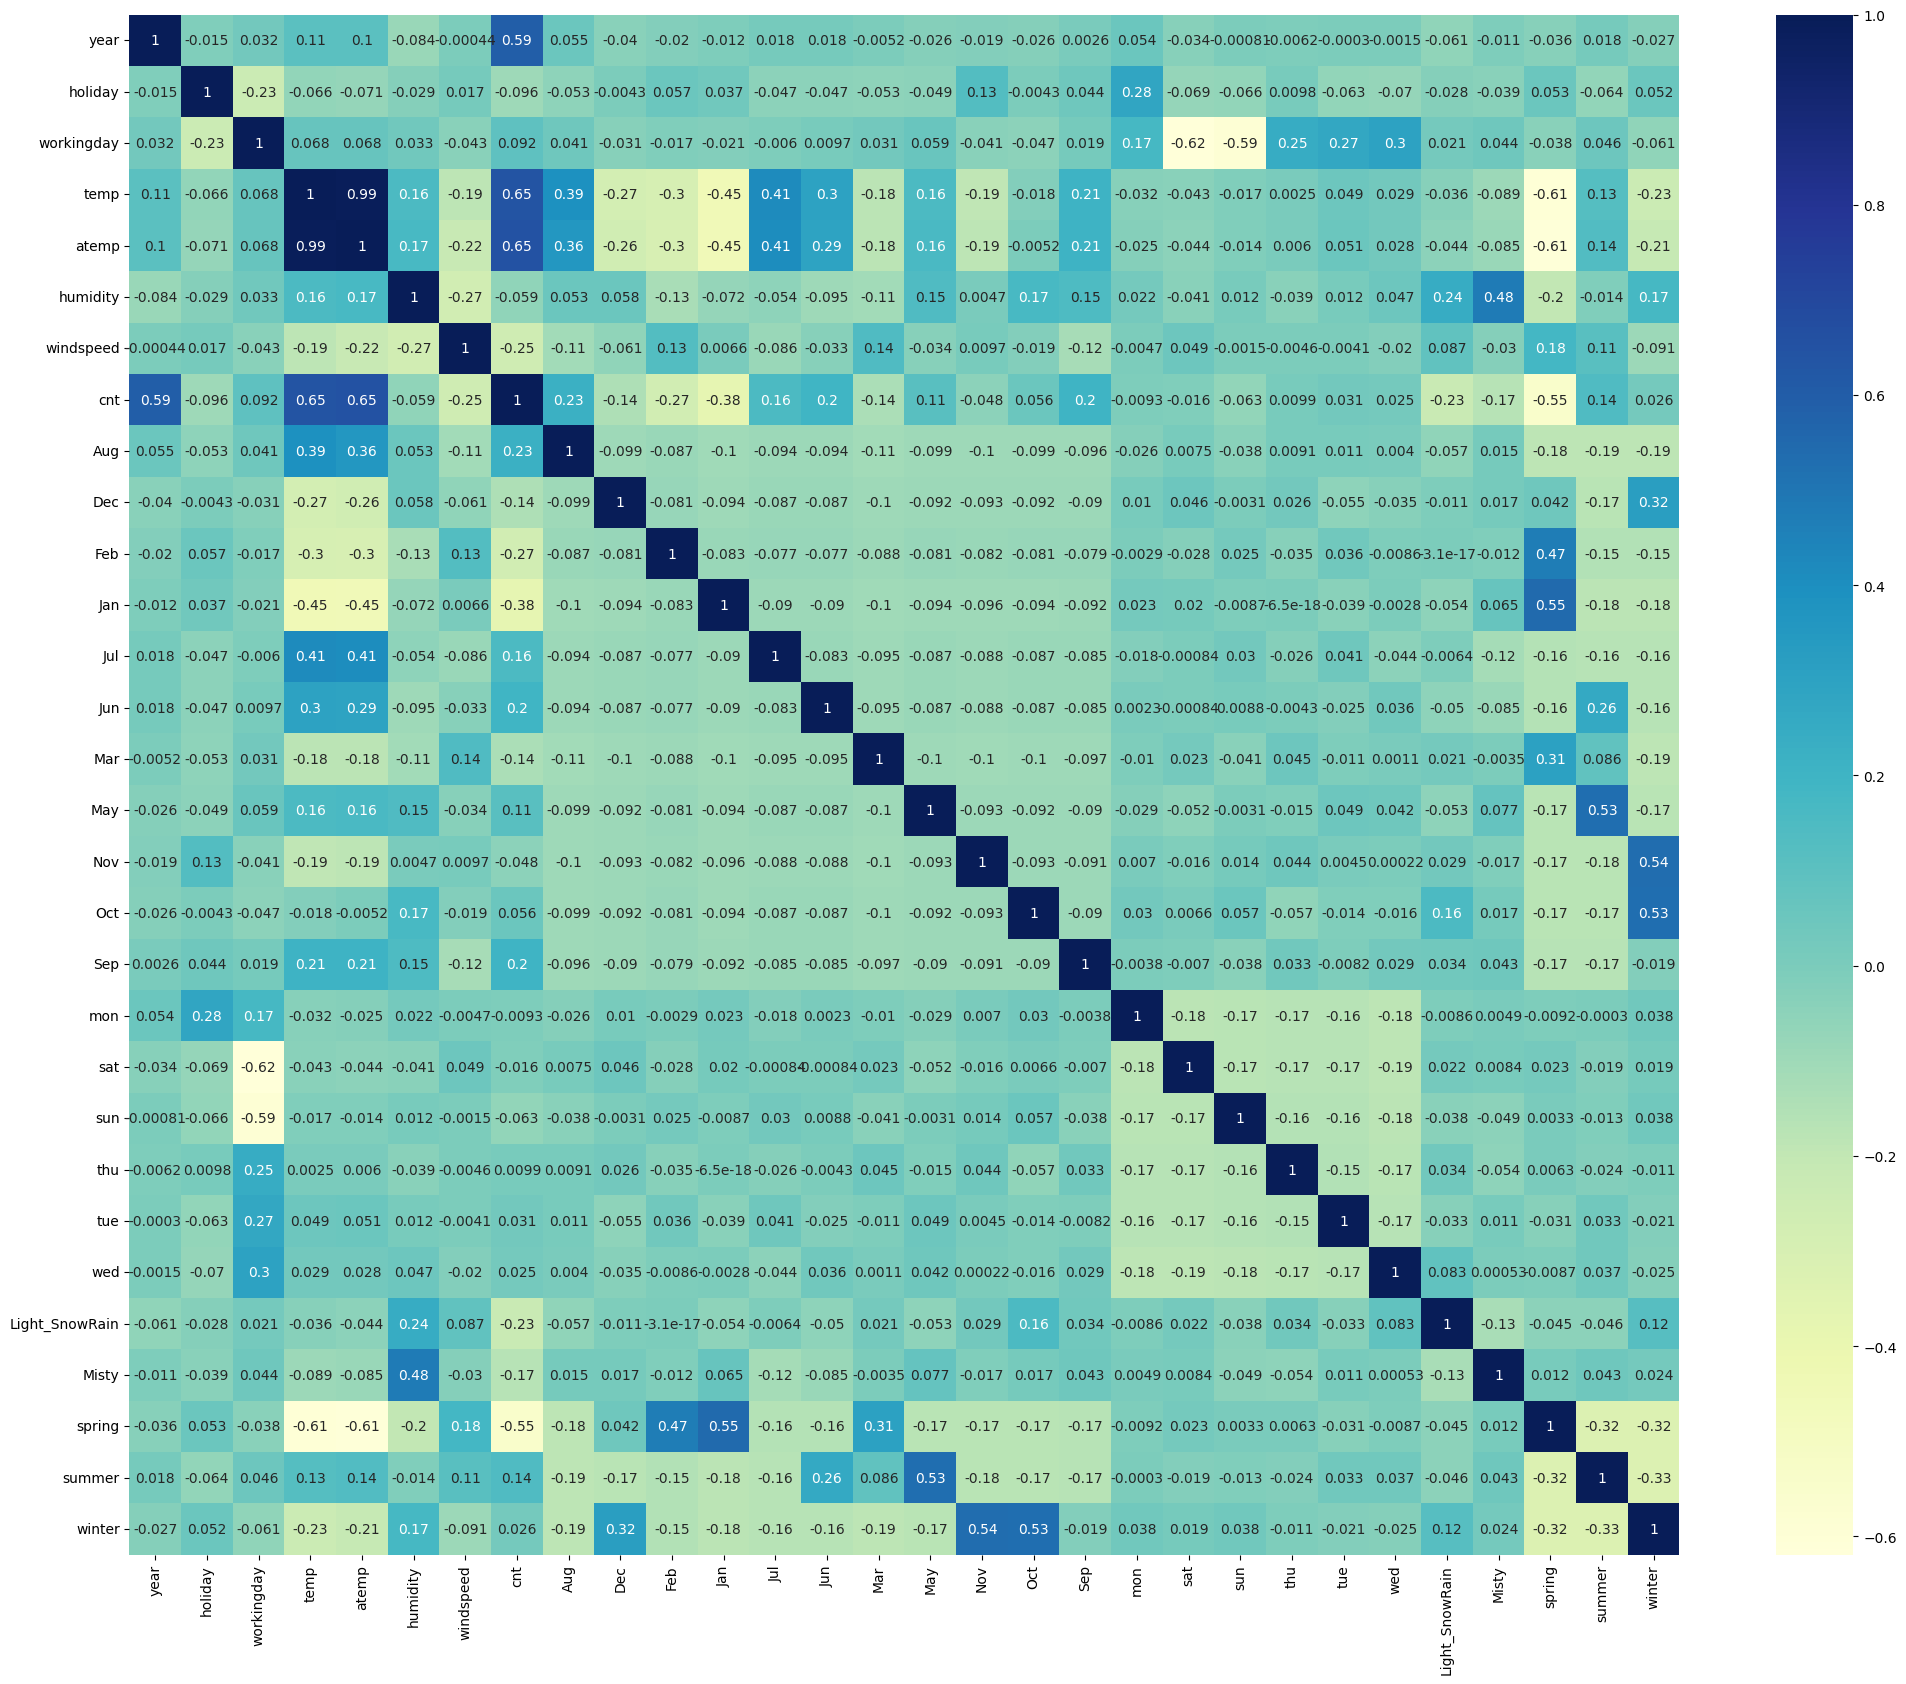

In [47]:
# Checking the correlation of all features
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

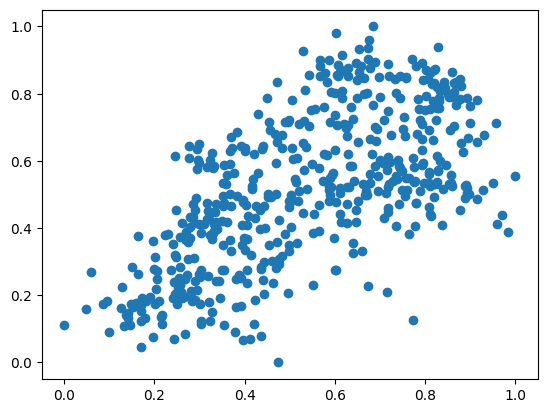

In [48]:
# Visualizing of temp correlation with cnt to see the trends via Scatter plot.
plt.scatter(df_train['temp'], df_train['cnt'])
plt.show()

In [49]:
# X_train, y_train split
y_train = df_train.pop('cnt')
X_train = df_train

In [50]:
# Checking first 2 records of y_train
y_train.head(2)

576    0.827658
426    0.465255
Name: cnt, dtype: float64

In [51]:
# Checking first 2 records of X_train
X_train.head(2)

,year,holiday,workingday,temp,atemp,humidity,windspeed,Aug,Dec,Feb,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
576,2019,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,1,0,0,0,0,0,0
426,2019,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,1,0,0,0,0,0,1,1,0,0


In [52]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

# running RFE
rfe = RFE(estimator=lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [53]:
#List of features selected in top 15 list
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 11),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 4),
 ('Feb', False, 5),
 ('Jan', False, 2),
 ('Jul', True, 1),
 ('Jun', False, 6),
 ('Mar', False, 13),
 ('May', False, 15),
 ('Nov', False, 3),
 ('Oct', False, 9),
 ('Sep', True, 1),
 ('mon', False, 12),
 ('sat', True, 1),
 ('sun', True, 1),
 ('thu', False, 10),
 ('tue', False, 14),
 ('wed', False, 8),
 ('Light_SnowRain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [54]:
# selecting the selected features via RFE in a list
col = X_train.columns[rfe.support_]
col

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'Jul',
       'Sep', 'sat', 'sun', 'Light_SnowRain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')

In [55]:
# checking for rejected columns 
X_train.columns[~rfe.support_]

Index(['atemp', 'Aug', 'Dec', 'Feb', 'Jan', 'Jun', 'Mar', 'May', 'Nov', 'Oct',
       'mon', 'thu', 'tue', 'wed'],
      dtype='object')

In [56]:
# Creating X_train dataframe with RFF selected features
X_train_rfe = X_train[col]

In [57]:
# Adding a constant variable
X_train_rfe = sm.add_constant(X_train_rfe)

In [58]:
# Running the linear model
lr = sm.OLS(y_train, X_train_rfe).fit()

In [59]:
# Check for the summary of linear model
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.11e-191
Time:                        11:15:17   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -370.7304     12.951    -28.

In [60]:
# Calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif 

,Features,VIF
2,holiday,inf
3,workingday,inf
9,sat,inf
10,sun,inf
13,spring,5.02
4,temp,3.62
15,winter,3.49
14,summer,2.62
5,humidity,1.91
12,Misty,1.57


## Step 5: Building a linear model

In [61]:
# Building 1st linear regression model
X_train_lr_1 = sm.add_constant(X_train_rfe)
lr_1 = sm.OLS(y_train,X_train_lr_1).fit()
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.11e-191
Time:                        11:15:17   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -370.7304     12.951    -28.

In [62]:
# As workingday shows high VIF values hence we can drop it
X_train_new = X_train_rfe.drop(['workingday'], axis = 1)

# Calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16868268.24
12,spring,5.02
3,temp,3.62
14,winter,3.49
13,summer,2.62
4,humidity,1.91
11,Misty,1.57
6,Jul,1.49
7,Sep,1.30
10,Light_SnowRain,1.25


In [63]:
# Building 2nd linear regression model
X_train_lr_2 = sm.add_constant(X_train_new)
lr_2 = sm.OLS(y_train,X_train_lr_2).fit()
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     195.7
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.11e-191
Time:                        11:15:17   Log-Likelihood:                 517.61
No. Observations:                 510   AIC:                            -1005.
Df Residuals:                     495   BIC:                            -941.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -463.3792     16.189    -28.

In [64]:
# Drop sat variable as it has high p-value
X_train_new = X_train_new.drop(['sat'], axis = 1)

# Calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16848143.43
11,spring,5.02
3,temp,3.62
13,winter,3.48
12,summer,2.62
4,humidity,1.90
10,Misty,1.57
6,Jul,1.49
7,Sep,1.30
9,Light_SnowRain,1.25


In [65]:
# Building 3rd linear regression model
X_train_lr_3 = sm.add_constant(X_train_new)
lr_3 = sm.OLS(y_train,X_train_lr_3).fit()
print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     210.8
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          2.12e-192
Time:                        11:15:17   Log-Likelihood:                 517.20
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     496   BIC:                            -947.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -462.8778     16.176    -28.

In [66]:
# Drop spring variable as it has high VIF
X_train_new = X_train_new.drop(['spring'], axis = 1)

# Calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16782366.02
4,humidity,1.88
3,temp,1.60
10,Misty,1.56
6,Jul,1.43
11,summer,1.33
12,winter,1.29
9,Light_SnowRain,1.24
7,Sep,1.19
5,windspeed,1.18


In [67]:
# Building 4th linear regression model
X_train_lr_4 = sm.add_constant(X_train_new)
lr_4 = sm.OLS(y_train,X_train_lr_4).fit()
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     224.9
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          5.03e-192
Time:                        11:15:17   Log-Likelihood:                 513.49
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     497   BIC:                            -945.9
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -460.1530     16.246    -28.

In [68]:
# Drop Jul variable as it has high p-value
X_train_new = X_train_new.drop(['Jul'], axis = 1)

# Calculate VIF of variables
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16749113.93
4,humidity,1.87
9,Misty,1.56
3,temp,1.27
11,winter,1.25
8,Light_SnowRain,1.24
10,summer,1.19
5,windspeed,1.18
6,Sep,1.12
1,year,1.03


In [69]:
# Building 5th linear regression model
X_train_lr_5 = sm.add_constant(X_train_new)
lr_5 = sm.OLS(y_train,X_train_lr_5).fit()
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     242.2
Date:                Wed, 27 Nov 2024   Prob (F-statistic):          7.31e-192
Time:                        11:15:18   Log-Likelihood:                 510.25
No. Observations:                 510   AIC:                            -996.5
Df Residuals:                     498   BIC:                            -945.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           -461.9753     16.317    -28.

In [70]:
# Checking the parameters and their coefficient values
lr_5.params

const            -461.975265
year                0.229040
holiday            -0.104967
temp                0.568603
humidity           -0.165299
windspeed          -0.184859
Sep                 0.104857
sun                -0.046376
Light_SnowRain     -0.243187
Misty              -0.053992
summer              0.090240
winter              0.140212
dtype: float64

## Step 6: Residual Analysis of the train data and validation

In [71]:
X_train_lr_5

,const,year,holiday,temp,humidity,windspeed,Sep,sun,Light_SnowRain,Misty,summer,winter
576,1.0,2019,0,0.815169,0.725633,0.264686,0,0,0,0,0,0
426,1.0,2019,0,0.442393,0.640189,0.255342,0,0,0,1,0,0
728,1.0,2019,0,0.245101,0.498067,0.663106,0,1,0,0,0,0
482,1.0,2019,0,0.395666,0.504508,0.188475,0,0,0,1,1,0
111,1.0,2018,0,0.345824,0.751824,0.380981,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,2019,0,0.863973,0.679690,0.187140,0,0,0,0,0,0
53,1.0,2018,0,0.202618,0.435939,0.111379,0,0,0,0,0,0
350,1.0,2018,0,0.248216,0.577930,0.431816,0,0,0,1,0,1
79,1.0,2018,0,0.462664,0.759870,0.529881,0,0,0,1,1,0


In [72]:
# Residual Analysis
y_train_pred = lr_5.predict(X_train_lr_5)

In [73]:
# evaluate 
r2_score(y_true=y_train, y_pred=y_train_pred)

0.8425158164852422

In [75]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2_score(y_true=y_train, y_pred=y_train_pred))*(X_train_lr_5.shape[0]-1)/(X_train_lr_5.shape[0]-X_train_lr_5.shape[1]-1),4)
print(adjusted_r2)

0.8387


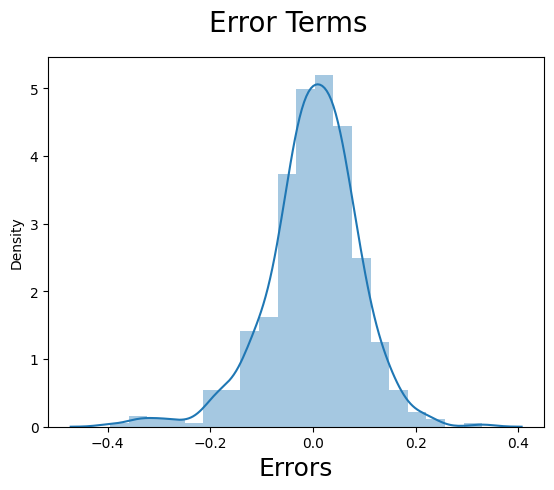

In [76]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)
plt.show()

## Step 7: Making Predictions Using the Final Model

In [77]:
# Applying scaling on the test dataset
num_vars = ['temp', 'atemp', 'humidity', 'windspeed','cnt']
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [78]:
# Checking first 2 records of X_train
df_test.head(2)

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
184,2018,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,2019,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0


In [79]:
# Checking basis statistic of df_test
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,2018.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182,0.254545,0.263636,0.236364
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833,0.436599,0.441609,0.425817
min,2018.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2018.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2019.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,2019.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
# X_test, y_test split
y_test = df_test.pop('cnt')
X_test = df_test

In [81]:
# Checking first 2 records of y_test
y_test.head(2)

184    0.692706
535    0.712034
Name: cnt, dtype: float64

In [82]:
# Checking first 2 records of X_test
X_test.head(2)

,year,holiday,workingday,temp,atemp,humidity,windspeed,Aug,Dec,Feb,...,sat,sun,thu,tue,wed,Light_SnowRain,Misty,spring,summer,winter
184,2018,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,1,0,0,0
535,2019,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [83]:
col1 = X_train_new[['year','holiday','temp','humidity','windspeed','Sep','sun','Light_SnowRain','Misty','summer','winter']]

X_test = X_test[['year','holiday','temp','humidity','windspeed','Sep','sun','Light_SnowRain','Misty','summer','winter']]

# Adding constant variable to test dataframe
X_test_lr_5 = sm.add_constant(X_test)

In [84]:
# predict 
y_pred = lr_5.predict(X_test_lr_5)

In [85]:
# evaluate 
r2_score(y_true=y_test, y_pred=y_pred)

0.8069072472777072

## Step 8: Model Evaluation

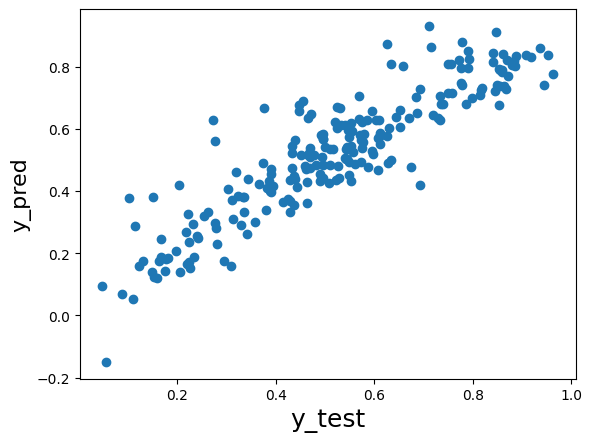

In [86]:
# Plotting y_test and y_pred to understand the spread
plt.scatter(y_test, y_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

In [87]:
# Calculating Adjusted-R^2 value for the test dataset
adjusted_r2 = round(1-(1-r2_score(y_true=y_test, y_pred=y_pred))*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7967


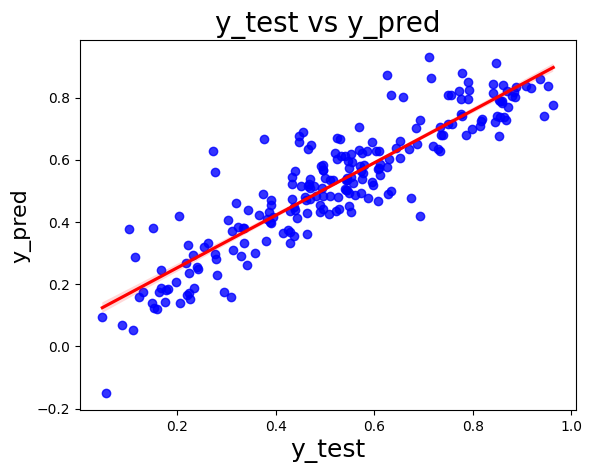

In [88]:
# Visualizing the fit on the test data
# plotting a Regression plot
sns.regplot(x=y_test, y=y_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

### Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.8425
- Test dataset R^2           : 0.8069
- Train dataset Adjusted R^2 : 0.8387    
- Test dataset Adjusted R^2  : 0.7967